## Import

In [52]:
import numpy as np

# About this text
This assignment is any assignment is. Submission is not mandatory.

### Purpose of the text

<li> To touch the implementation that uses probability distribution consciously
<li> To touch the Python dictionary </li>
    
### How to learn
Here, select one of the six darts and create a simulation to throw the darts. Even if it is called a simulation, it is not a video, but creates something like the following.

![alt text](dart.png "Title")

What you need to pay attention to is how to express **the act of choosing a dart's mat and the place where a dart's arrow is stuck** by programming.


You will also learn about probability distributions and dictionaries by implementing dart throwing.

# What is a probability distribution

## Problem 1: Choosing a dart mat
Let's implement the dice to choose the darts deck.

**Hint:**
We use np.random.choice() to express the action of "rolling the dice". By doing this, you can randomly select one element from the array.


In [351]:
class dice():
    def __init__(self, value):
        """Number of darts"""
        self.value = [*range(value)]
    def roll(self):
        return np.random.choice(self.value)
myDice = dice(5)
myDice.roll()

2

## Problem 2: Throw darts and record the place

Let's express the place where the darts are stuck (x coordinate, y coordinate) by generating values from a normal distribution. **Set the “center” of the normal distribution in the x direction to the number of the dice given in question 1, and the “standard deviation” to 0.1.** Make sure to hold the location (coordinates) that you have stuck in an array.

The place (coordinates) where the darts are stuck should be expressed as the intersection of the x and y coordinates when the two-dimensional normal distribution is viewed from directly above. Each value of x-coordinate and y-coordinate shall follow independent one-dimensional normal distribution, generate variables from np.random.normal() separately for x-coordinate and y-coordinate, and coordinate them. Please hold in an array as points.

The two-dimensional normal distribution can also be expressed using np.random.multivariate_normal(). In that case, for example, [0,0] ( mean=[0,0] ), and the covariance matrix as [ [[0.01,0],[0,0.01]] ( cov=[[0.01,0],[0,0.01]] ) and np.random.multivariate_normal(mean, cov) , we can create a set of variables for x and y coordinates.

In [77]:
mean = [0, 0]
cov=[[0.01,0],[0,0.01]] 

## Problem 3: Throw a lot of darts and record them in a state of being tied to the number

Throw the darts 1000 times and store all the darts stick positions in the dictionary. The dictionary key will be the number of the darts.

**Hint:**
"Throwing 1000 darts" means Roll the dice in question 1000 1000 times . In addition to problem 1 and problem 2, the operation to store the coordinates in the dictionary will be implemented in the for statement

In [116]:
# x = np.random.multivariate_normal(mean, cov, (1000, 1000))
result = {0:[],1:[],2:[],3:[],4:[],5:[]}
for _ in range(1000):
    dice = myDice.roll()
    dart = np.random.multivariate_normal(mean, cov)
    result[dice] = result[dice]+ [[dart[0],dart[1]]]

## Problem 4: Drawing the position of the darts
Let's extract the value for each key from the dictionary created in problem 3 and draw the place where it is stuck for each key. Use the matplotlib patches class to represent the darts.



In [127]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

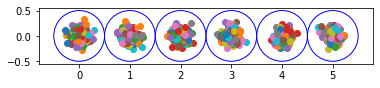

In [134]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
%matplotlib inline

fig, ax = plt.subplots()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for key, val in result.items():
    circleK = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    ax.add_patch(circleK)
    
    color = random.choice(colors)
    for value in val:
        plt.scatter(value[0]+key, value[1])
ax.set_aspect('equal')

## Problem 5:Functionalization
Let's functionalize the code created in Problem 1 to Problem 4 so that you can draw even if the number of darts thrown or the number of darts is changed.

**Hint**
Let's use the number of darts thrown and the number of darts as a function argument.

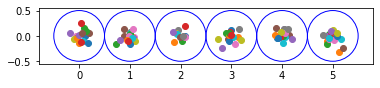

In [357]:
def dart_simulation(darts,throw):
    
    class dice():
        def __init__(self, value):
            """Number of darts"""
            self.value = [*range(value)]
        def roll(self):
            return np.random.choice(self.value)
    
    my_darts = dice(darts)
    result = {}
    
    #Initialize the dictionary
    for x in range(darts):
        result[x] = []
    
    #Mean and covarience
    mean = [0, 0]
    cov=[[0.01,0],[0,0.01]] 
    
    #Generate numbers
    for _ in range(throw):
        dices = my_darts.roll()
        dart = np.random.multivariate_normal(mean, cov)
        result[dices] = result[dices]+ [[dart[0],dart[1]]]
    
    #Draw    
    fig, ax = plt.subplots()
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for key, val in result.items():
        circleK = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
        ax.add_patch(circleK)

        color = random.choice(colors)
        for value in val:
            plt.scatter(value[0]+key, value[1])
    ax.set_aspect('equal')

dart_simulation(6,100)


## Development: Mathematical story of darts simulation
There were some parts of the implementation that used probability distributions. Specifically:


<li> Representing which to choose by rolling dice with uniform distribution </li>

<li> Expressed by assuming that the place where the darts stick is a normal distribution </li>

In other words, these two events **occur stochastically** . Assuming that, we simulated. In this way, we can construct a model under the hypothesis that an output is generated stochastically for a certain input. It is called **Stochastic generative model .**


The model here is not a machine learning model, but general mathematical simulations in general.


A dice whose distribution of outcomes follows a uniform distribution can be represented as follows.

 p 
 ( 
 d 
 = 
 1 
 ) 
 = 
 1 
 6 
 , 
 ⋯ 
 , 
 p 
 ( 
 d 
 = 
 6 
 ) 
 = 
 1 
 6 
 
The place where the dart sticks can be expressed as follows, assuming that the x and y coordinates follow a normal distribution.


 p 
 ( 
 x 
 | 
 d 
 ) 
 = 
 p 
 ( 
 x 
 | 
 μ 
 ( 
 d 
 ) 
 ) 
 = 
 N 
 ( 
 x 
 | 
 μ 
 ( 
 d 
 ) 
 , 
 σ 
 2 
 ) 

Then, rolling the dice → two consecutive events of sampling the x-coordinate and y-coordinate data from the normal distribution can be expressed by the product of the above two probability distributions, so the place where the dart sticks is the probability density It can be expressed as a distribution.


 p 
 ( 
 x 
 ) 
 = 
 ∑ 
 6 
 d 
 = 
 1 
 p 
 ( 
 d 
 ) 
 p 
 ( 
 x 
 | 
 d 
 ) 
 = 
 ∑ 
 6 
 d 
 = 
 1 
 1 
 6 
 N 
 ( 
 x 
 | 
 μ 
 ( 
 d 
 ) 
 , 
 σ 
 2 
 ) 

The probability distribution obtained by the weighted average of several normal distributions like this is called the **Mixed normal distribution.**


In this section, we worked on programming using probability distributions in order to get an entrance to probabilistic generative models. Generative models such as GAN and VAE are also used for things that are often covered in the media, such as animation character generation. There is no need to study them now, but it is good to remember that they are models that are constructed based on the hypothesis that events occur stochastically and that outputs are generated stochastically for certain inputs. Translated with www.DeepL.com/Translator (free version) **A model constructed under the hypothesis that an output is generated stochastically for an input, assuming that events occur stochastically**. It's good to remember that.